In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression   # Imported libraries
data = pd.read_csv("Regression Model Data +Tech - 2024 Draft Combine Stats (1).csv")
data.replace("-", pd.NA, inplace=True)
data["Shuttle Run"] = pd.to_numeric(data["Shuttle Run"])    # Changed datatypes to numeric to proceed with analysis
data.head()

,PLAYER,POS,Height,Weight,Wingspan,Standing Reach,Hand Length,Hand Width,Lane Agility Time,Shuttle Run,Three Quarter Sprint,Standing Vertical Leap,Max Vertical Leap,PPG,Free Throw %,Three Point %,Two Point %,EFG
0,Michael Ajayi,SF,77.75,227.8,84.75,106.5,9.50,9.75,11.77,3.17,3.38,27.0,34.5,17.2,70.9,47.0,46.6,51.1
1,Melvin Ajinca,SF,79.25,213.8,79.50,106.5,8.50,9.75,11.78,3.00,NaN,26.5,31.0,9.3,79.7,30.9,50.7,47.8
2,Trey Alexander,SG,75.25,187.0,82.50,101.5,8.75,10.00,11.37,2.92,3.21,26.5,32.0,17.6,82.4,33.9,50.4,50.6
3,Izan Almansa,C,81.25,219.6,85.00,110.0,9.25,9.25,10.94,2.96,3.11,28.0,35.0,8.2,37.9,22.2,55.2,53.3
4,Reece Beekman,PG,73.25,196.4,78.50,100.0,8.50,9.00,10.86,3.08,2.94,30.0,36.5,14.3,75.4,31.0,48.7,48.2


In [2]:
position_map = {
    "PG": "Guard", 
    "SG": "Guard",
    "PG-SG": "Guard",
    "SF": "Forward", 
    "PF": "Forward", 
    "C": "Center"
    }

data["POS"] = data["POS"].replace(position_map)         # Changed the format of the position to column to group players as Guards, Forwards, Centers
data.head() 

,PLAYER,POS,Height,Weight,Wingspan,Standing Reach,Hand Length,Hand Width,Lane Agility Time,Shuttle Run,Three Quarter Sprint,Standing Vertical Leap,Max Vertical Leap,PPG,Free Throw %,Three Point %,Two Point %,EFG
0,Michael Ajayi,Forward,77.75,227.8,84.75,106.5,9.50,9.75,11.77,3.17,3.38,27.0,34.5,17.2,70.9,47.0,46.6,51.1
1,Melvin Ajinca,Forward,79.25,213.8,79.50,106.5,8.50,9.75,11.78,3.00,NaN,26.5,31.0,9.3,79.7,30.9,50.7,47.8
2,Trey Alexander,Guard,75.25,187.0,82.50,101.5,8.75,10.00,11.37,2.92,3.21,26.5,32.0,17.6,82.4,33.9,50.4,50.6
3,Izan Almansa,Center,81.25,219.6,85.00,110.0,9.25,9.25,10.94,2.96,3.11,28.0,35.0,8.2,37.9,22.2,55.2,53.3
4,Reece Beekman,Guard,73.25,196.4,78.50,100.0,8.50,9.00,10.86,3.08,2.94,30.0,36.5,14.3,75.4,31.0,48.7,48.2


In [3]:
grouped = data["POS"].value_counts()
grouped

POS
Forward    37
Guard      25
Center     14
Name: count, dtype: int64

### **All graphs below will compare the variables with Free Throw % for only Forwards**

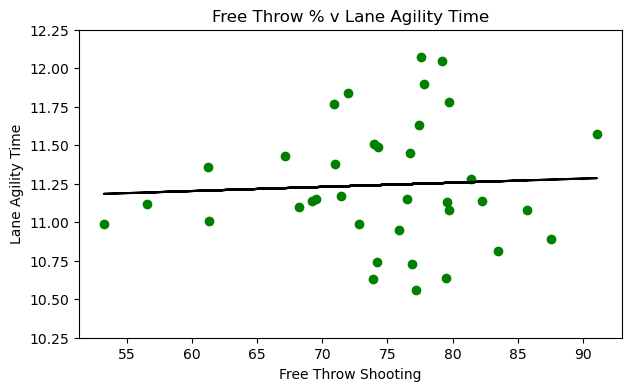

In [6]:
forwards = data[data["POS"] == "Forward"]
plt.figure(figsize= (7,4))
x = forwards[["Free Throw %"]]
y = forwards["Lane Agility Time"]
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
plt.scatter(x,y, color = "green")
plt.plot(x, predictions, color = "black")
plt.xlabel("Free Throw Shooting")
plt.ylabel("Lane Agility Time")
plt.title("Free Throw % v Lane Agility Time")
plt.ylim(10.25,13)
plt.show()

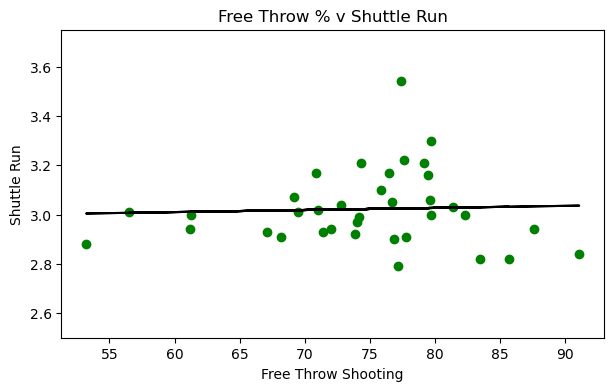

In [8]:
data.dropna(subset=["Free Throw %", "Shuttle Run"], inplace = True)
forwards = data[data["POS"] == "Forward"]
plt.figure(figsize= (7,4))
x = forwards[["Free Throw %"]]
y = forwards["Shuttle Run"]
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
plt.scatter(x,y, color = "green")
plt.plot(x, predictions, color = "black")
plt.xlabel("Free Throw Shooting")
plt.ylabel("Shuttle Run")
plt.title("Free Throw % v Shuttle Run")
plt.ylim(2.75,3.75)
plt.show()

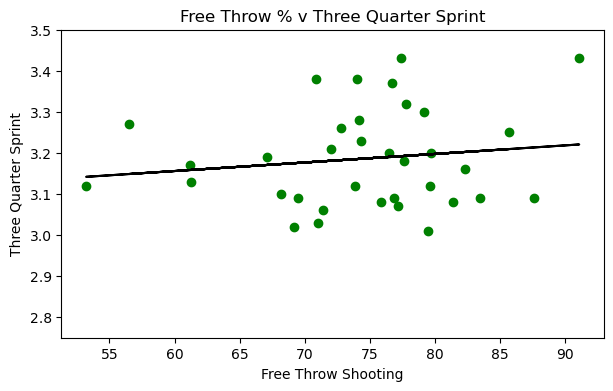

In [11]:
data.dropna(subset=["Free Throw %", "Three Quarter Sprint"], inplace = True)
forwards = data[data["POS"] == "Forward"]
plt.figure(figsize= (7,4))
x = forwards[["Free Throw %"]]
y = forwards["Three Quarter Sprint"]
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
plt.scatter(x,y, color = "green")
plt.plot(x, predictions, color = "black")
plt.xlabel("Free Throw Shooting")
plt.ylabel("Three Quarter Sprint")
plt.title("Free Throw % v Three Quarter Sprint")
plt.ylim(2.75,3.75)
plt.show()

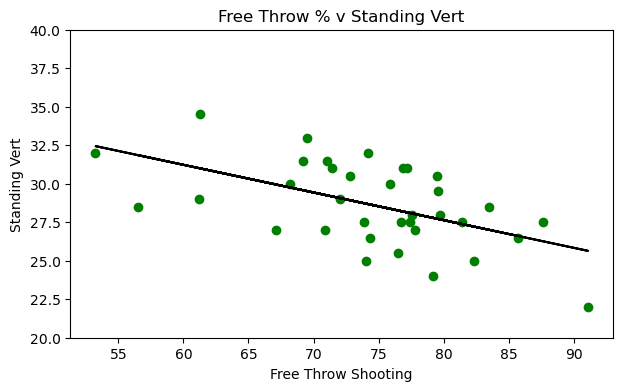

In [13]:
data.dropna(subset=["Free Throw %", "Standing Vertical Leap"], inplace = True)
forwards = data[data["POS"] == "Forward"]
plt.figure(figsize= (7,4))
x = forwards[["Free Throw %"]]
y = forwards["Standing Vertical Leap"]
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
plt.scatter(x,y, color = "green")
plt.plot(x, predictions, color = "black")
plt.xlabel("Free Throw Shooting")
plt.ylabel("Standing Vert")
plt.title("Free Throw % v Standing Vert")
plt.ylim(20,45)
plt.show()

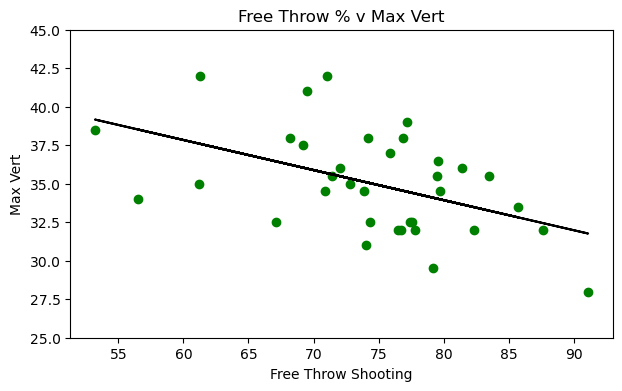

In [15]:
data.dropna(subset=["Free Throw %", "Max Vertical Leap"], inplace = True)
forwards = data[data["POS"] == "Forward"]
plt.figure(figsize= (7,4))
x = forwards[["Free Throw %"]]
y = forwards["Max Vertical Leap"]
model = LinearRegression()
model.fit(x,y)
predictions = model.predict(x)
plt.scatter(x,y, color = "green")
plt.plot(x, predictions, color = "black")
plt.xlabel("Free Throw Shooting")
plt.ylabel("Max Vert")
plt.title("Free Throw % v Max Vert")
plt.ylim(25,50)
plt.show()